In [273]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [ ]:
path = r'path'
df = pd.read_csv(path) 

### Question 1

In [275]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [276]:
df.isnull().sum(axis = 0)

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [277]:
col = df.columns
for item in col:
    print(df[item].dtype, item)

object GPA
int64 Gender
int64 breakfast
int64 calories_chicken
float64 calories_day
float64 calories_scone
int64 coffee
object comfort_food
object comfort_food_reasons
float64 comfort_food_reasons_coded
float64 cook
int64 comfort_food_reasons_coded.1
float64 cuisine
object diet_current
int64 diet_current_coded
float64 drink
object eating_changes
int64 eating_changes_coded
int64 eating_changes_coded1
int64 eating_out
float64 employment
int64 ethnic_food
float64 exercise
float64 father_education
object father_profession
object fav_cuisine
int64 fav_cuisine_coded
float64 fav_food
object food_childhood
int64 fries
int64 fruit_day
int64 grade_level
int64 greek_food
int64 healthy_feeling
object healthy_meal
object ideal_diet
int64 ideal_diet_coded
float64 income
int64 indian_food
int64 italian_food
float64 life_rewarding
float64 marital_status
object meals_dinner_friend
float64 mother_education
object mother_profession
int64 nutritional_check
float64 on_off_campus
int64 parents_cook
int64 pa

In [278]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [279]:
df['weight'][2] = np.nan
df['weight'] = df['weight'].str.extract('(\d+)').astype('Int64')
df['weight'][3] = 240
df['weight']

C:\Users\adity\AppData\Local\Temp\ipykernel_29060\1722248967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'][2] = np.nan


0       187
1       155
2      <NA>
3       240
4       190
       ... 
120     156
121     180
122     120
123     135
124     135
Name: weight, Length: 125, dtype: Int64

In [280]:
df['GPA']=df['GPA'].replace('Personal ',np.NaN)
df['GPA']=df['GPA'].replace('Unknown',np.NaN)
df['GPA']=df['GPA'].replace('3.79 bitch',3.79)

In [281]:
df['GPA']=df['GPA'].astype(np.float64)

In [282]:
col = df.select_dtypes(include = 'O')
for item in col:
    df = df[df[item].notna()]

In [283]:
df.shape

(96, 61)

In [284]:
for item in df.columns:
    if(df[item].isnull().sum()):
        print(df[item].isnull().sum(), df[item].dtype, item)

2 float64 GPA
14 float64 calories_day
1 float64 calories_scone
12 float64 comfort_food_reasons_coded
1 float64 cook
11 float64 cuisine
1 float64 drink
7 float64 employment
11 float64 exercise
2 float64 fav_food
1 float64 life_rewarding
1 float64 marital_status
1 float64 on_off_campus
1 float64 persian_food
1 float64 self_perception_weight
2 float64 sports
1 float64 tortilla_calories
2 Int64 weight


In [285]:
df['calories_day'].unique()

array([nan,  3.,  4.,  2.])

In [286]:
df['cuisine'].unique()

array([nan,  1.,  3.,  2.,  6.,  4.,  5.])

In [287]:
df['employment'].unique()

array([ 3.,  2.,  1., nan])

In [288]:
df['GPA'] = df['GPA'].fillna(df['GPA'].mean())
df = df[df['weight'].notna()]
for item in df.columns:
    if(df[item].isnull().sum() <= 2) and (df[item].isnull().sum() > 0):
        df[item] = df[item].fillna(df[item].mean())

df = df.reset_index()

In [289]:
for col in df.columns:
    if(df[col].isnull().sum()):
        print(df[col].isnull().sum(), df[col].dtype, col)

14 float64 calories_day
12 float64 comfort_food_reasons_coded
10 float64 cuisine
7 float64 employment
10 float64 exercise


<Axes: ylabel='calories_day'>

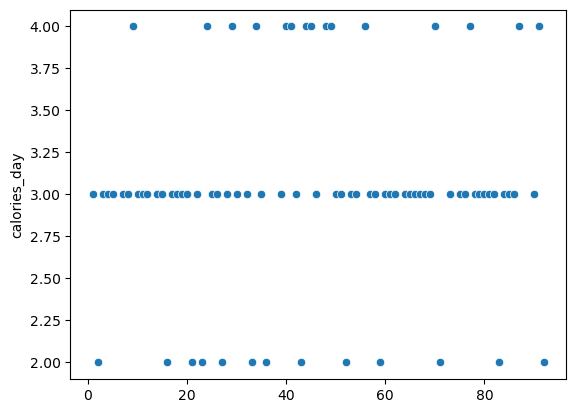

In [290]:
sns.scatterplot(data=df, x=df.index, y=df['calories_day'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d57d806810>,
 'caps': [<matplotlib.lines.Line2D at 0x1d57d817d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d57d816290>],
 'medians': [<matplotlib.lines.Line2D at 0x1d57d824e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d57d8255d0>],
 'means': []}

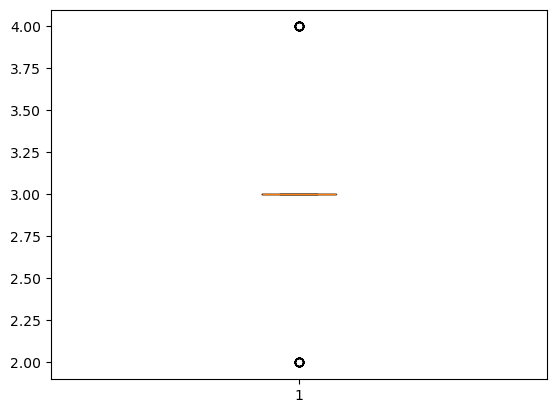

In [291]:
plt.boxplot(df['calories_day'][~np.isnan(df['calories_day'])])

In [292]:
df['calories_day'] = df['calories_day'].fillna(3.0) 

<Axes: ylabel='cuisine'>

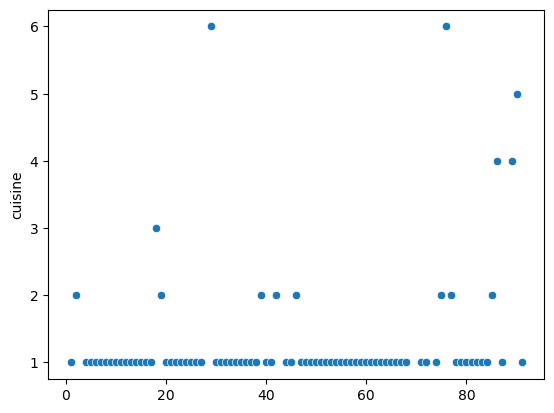

In [293]:
sns.scatterplot(data=df, x=df.index, y=df['cuisine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d57db05690>,
 'caps': [<matplotlib.lines.Line2D at 0x1d57db069d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d57db04d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d57db07b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d57db10350>],
 'means': []}

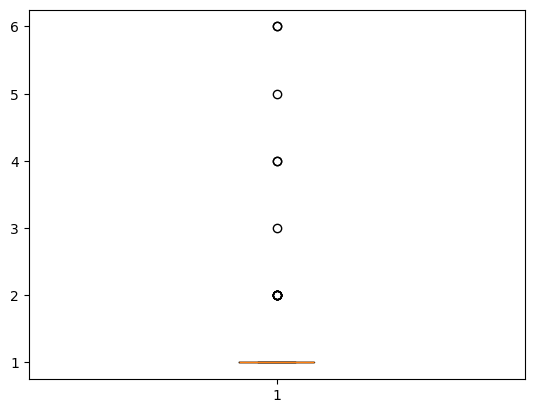

In [294]:
plt.boxplot(df['cuisine'][~np.isnan(df['cuisine'])])

In [295]:
df['cuisine'] = df['cuisine'].fillna(1.0)

<Axes: ylabel='exercise'>

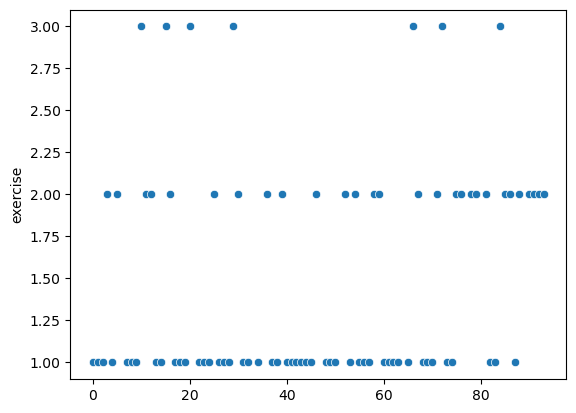

In [296]:
sns.scatterplot(data=df, x=df.index, y=df['exercise'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d57dbcf390>,
 'caps': [<matplotlib.lines.Line2D at 0x1d57dbd8c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d57dbce9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d57dbda110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d57dbdaad0>],
 'means': []}

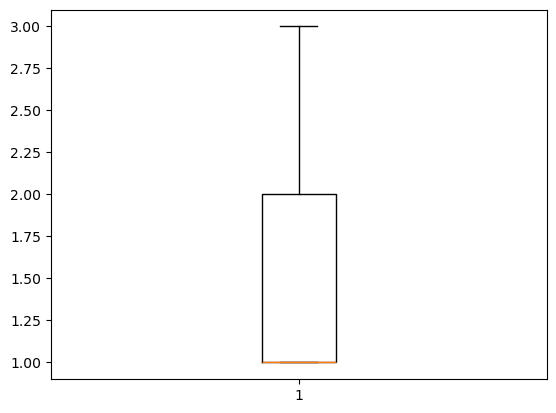

In [297]:
plt.boxplot(df['exercise'][~np.isnan(df['exercise'])])

In [298]:
df['exercise'] = df['exercise'].fillna(2.0)

<Axes: ylabel='employment'>

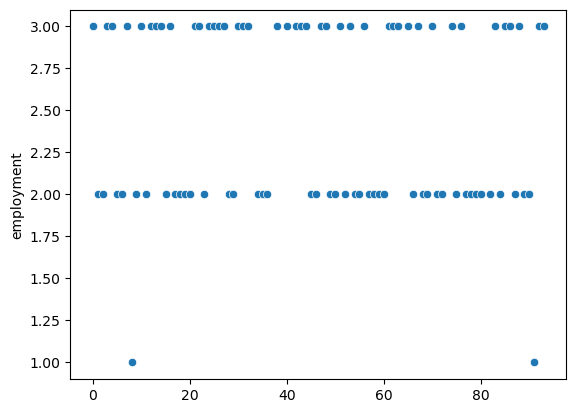

In [299]:
sns.scatterplot(data=df, x=df.index, y=df['employment'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d57dcb8110>,
 'caps': [<matplotlib.lines.Line2D at 0x1d57dcb96d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d57dcaf590>],
 'medians': [<matplotlib.lines.Line2D at 0x1d57dcbab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d57dcbb510>],
 'means': []}

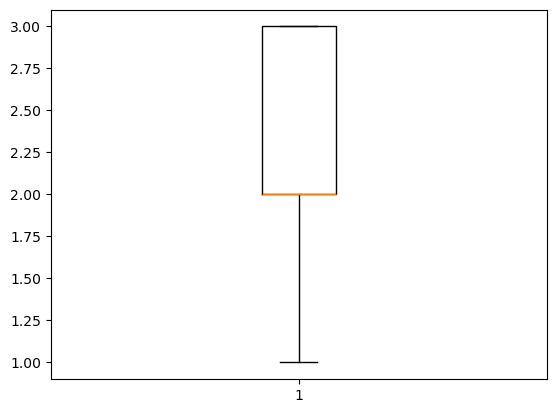

In [300]:
plt.boxplot(df['employment'][~np.isnan(df['employment'])])

In [301]:
df['employment'] = df['employment'].fillna(df['employment'].median())
df['comfort_food_reasons_coded'] = df['comfort_food_reasons_coded'].fillna(df['comfort_food_reasons_coded'].median())

In [302]:
df.isnull().sum().sum()

0

In [303]:
df.duplicated().sum()

0

## Cleaned Data

### Question 2

In [304]:
df.columns

Index(['index', 'GPA', 'Gender', 'breakfast', 'calories_chicken',
       'calories_day', 'calories_scone', 'coffee', 'comfort_food',
       'comfort_food_reasons', 'comfort_food_reasons_coded', 'cook',
       'comfort_food_reasons_coded.1', 'cuisine', 'diet_current',
       'diet_current_coded', 'drink', 'eating_changes', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food'

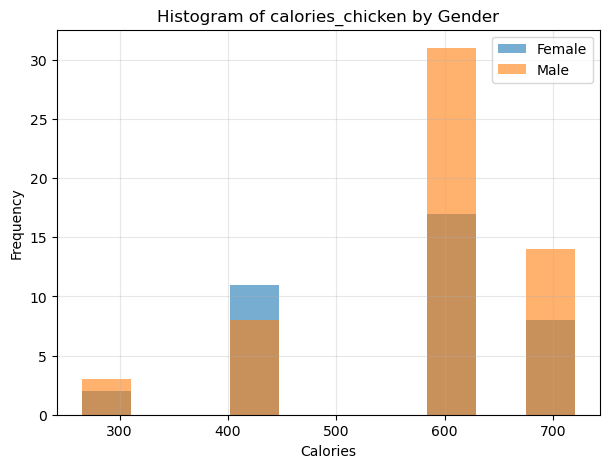

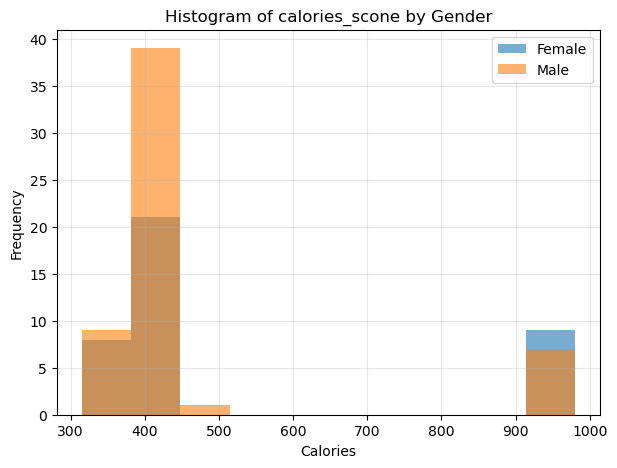

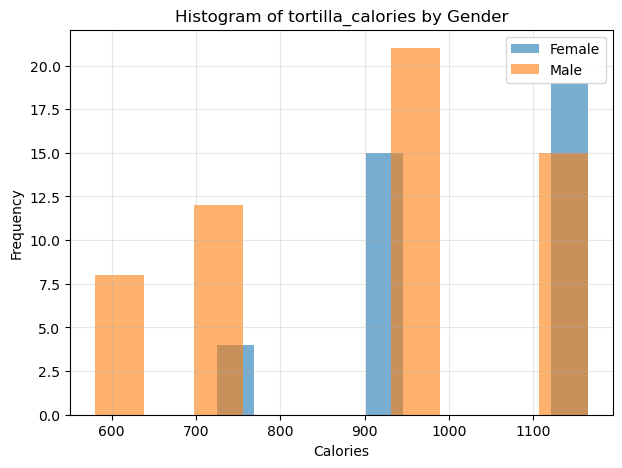

In [305]:
# calories_Chicken, calories_scone, tortilla_calories
foods = ['calories_chicken', 'calories_scone', 'tortilla_calories']
gender_map = {1: 'Male', 2: 'Female'}

for food in foods:
    plt.figure(figsize=(7, 5))

    for g in df['Gender'].unique():
        subset = df[df['Gender'] == g][food]
        plt.hist(subset, bins=10, alpha=0.6, label=gender_map.get(g, str(g)))

    plt.title(f'Histogram of {food} by Gender')
    plt.xlabel('Calories')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

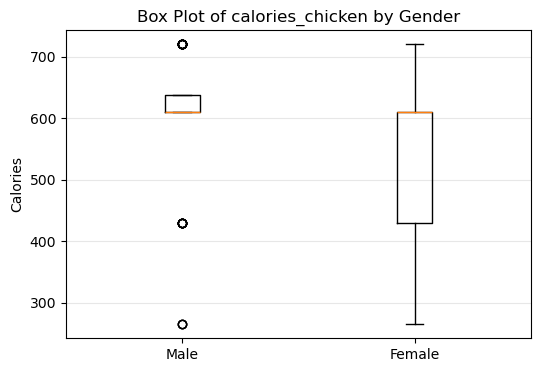

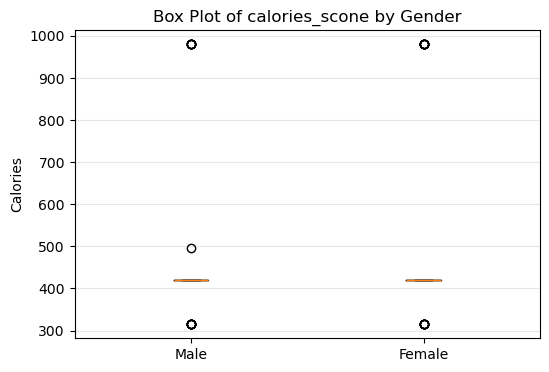

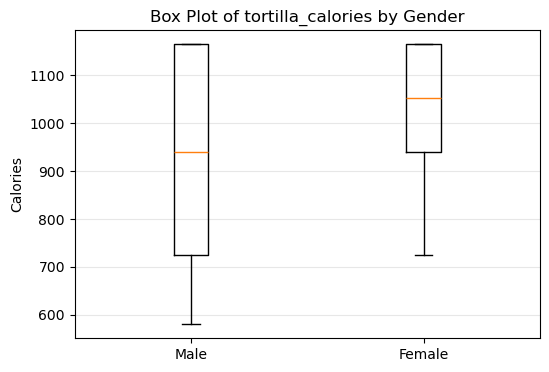

In [306]:
for food in foods:
    plt.figure(figsize=(6, 4))

    male = df[df['Gender'] == 1][food]
    female = df[df['Gender'] == 2][food]

    plt.boxplot([male, female],
                labels=['Male', 'Female'],
                showfliers=True)

    plt.title(f'Box Plot of {food} by Gender')
    plt.ylabel('Calories')
    plt.grid(axis='y', alpha=0.3)

    plt.show()


### Question 3

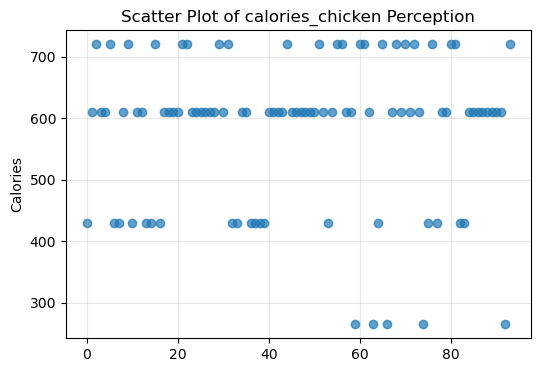

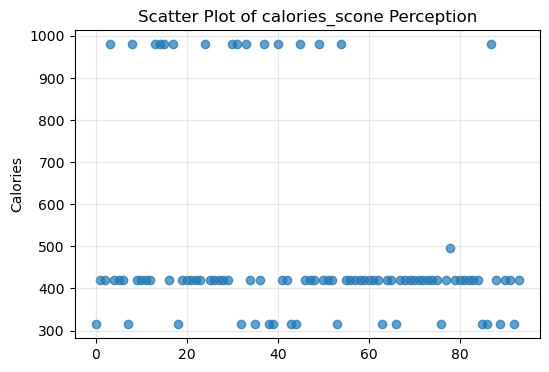

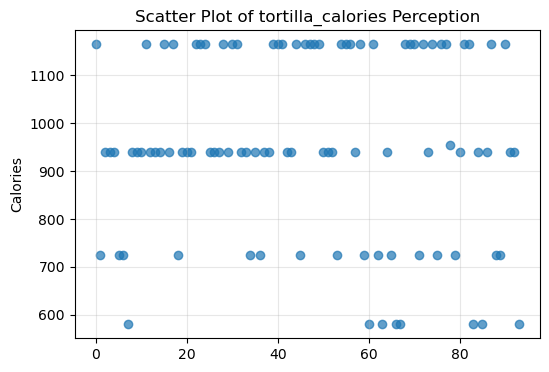

In [307]:
for food in foods:
    plt.figure(figsize=(6, 4))

    plt.scatter(range(len(df)), df[food], alpha=0.7)

    plt.ylabel('Calories')
    plt.title(f'Scatter Plot of {food} Perception')

    plt.grid(alpha=0.3)
    plt.show()


### Question 4

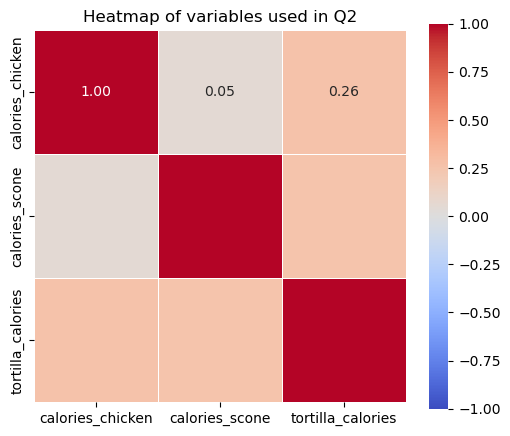

In [308]:
corr_matrix = df[foods].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, cbar=True      
)

plt.title('Heatmap of variables used in Q2')
plt.show()


### Question 5

In [309]:
df['breakfast'].unique()

array([1, 2], dtype=int64)

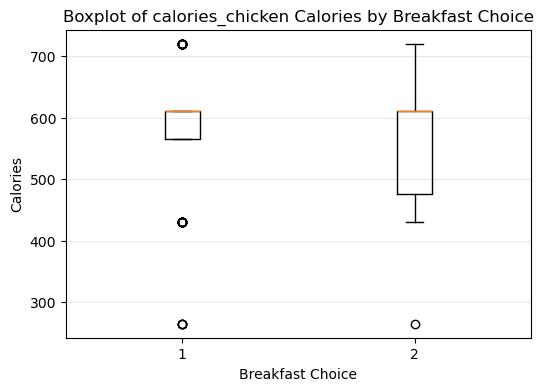

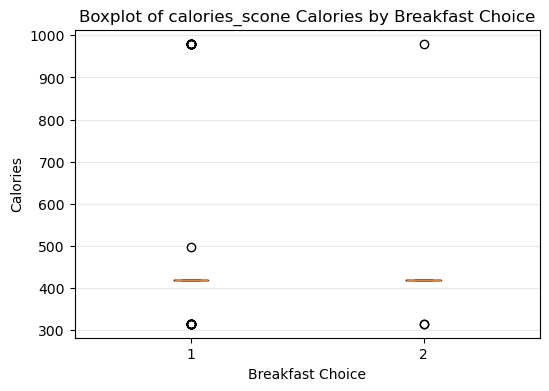

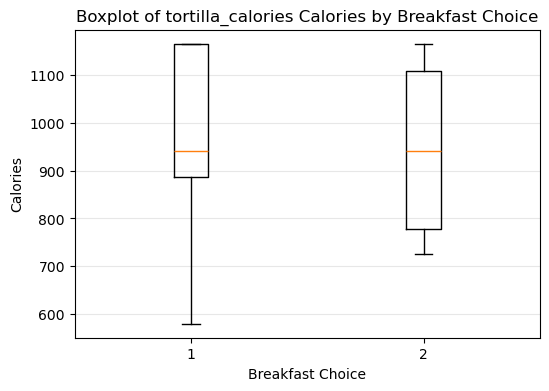

In [310]:
for food in foods:
    plt.figure(figsize=(6, 4))

    groups = [
        df[df['breakfast'] == b][food]
        for b in sorted(df['breakfast'].unique())
    ]

    plt.boxplot(groups, labels=sorted(df['breakfast'].unique()), showfliers=True)

    plt.xlabel('Breakfast Choice')
    plt.ylabel('Calories')
    plt.title(f'Boxplot of {food} Calories by Breakfast Choice')
    plt.grid(axis='y', alpha=0.3)
    plt.show()


### Question 6

In [311]:
print(corr_matrix)

                   calories_chicken  calories_scone  tortilla_calories
calories_chicken           1.000000        0.050671           0.261574
calories_scone             0.050671        1.000000           0.257404
tortilla_calories          0.261574        0.257404           1.000000


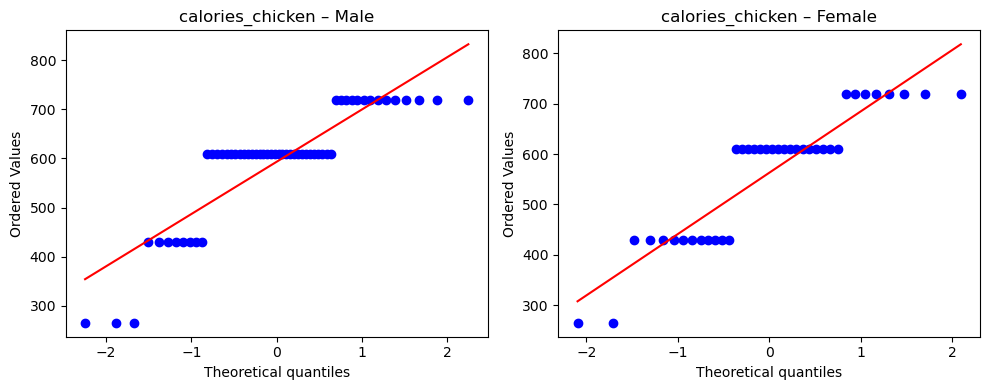

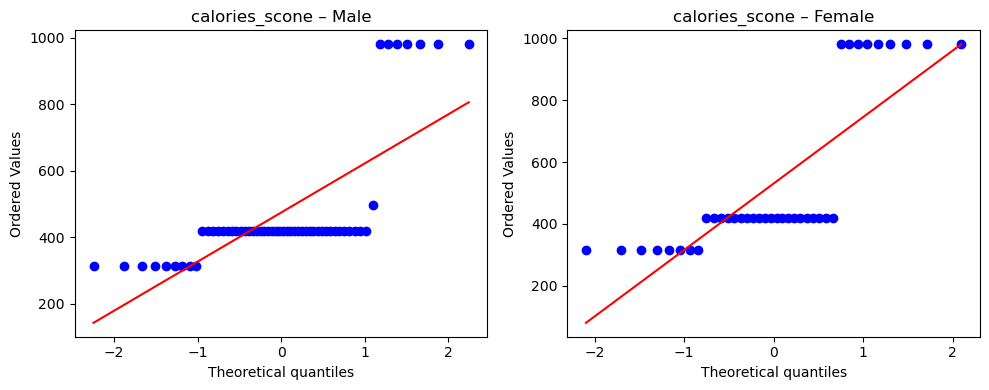

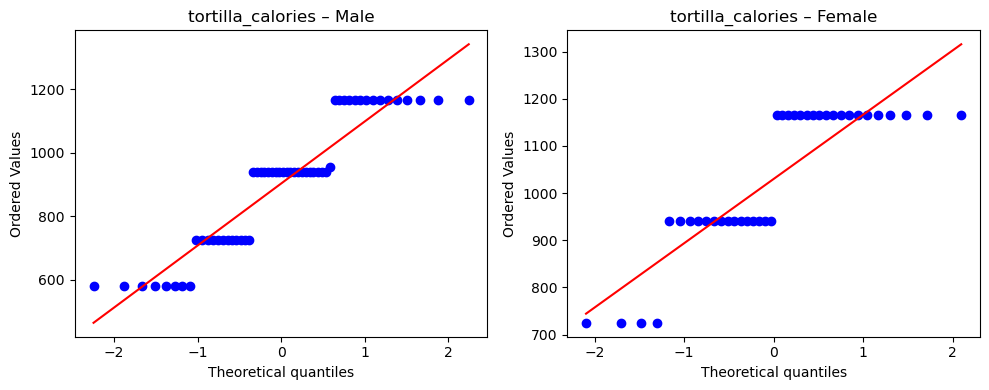

In [312]:
gender_map = {1: 'Male', 2: 'Female'}

for food in foods:
    plt.figure(figsize=(10, 4))
    for item, gender in enumerate([1, 2], 1):
        plt.subplot(1, 2, item)
        data = df[df['Gender'] == gender][food].dropna()
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f'{food} – {gender_map[gender]}')

    plt.tight_layout()
    plt.show()